In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

AIR 데이터셋 

In [4]:
air_21 = pd.read_csv("data_pm/air_2021.csv")
air_21 = air_21.loc[:,"지역":]
air_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19


In [5]:
air_22 = pd.read_csv("data_pm/air_2022.csv")
air_22 = air_22.loc[:,"지역":]
air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19


In [6]:
air_21.shape, air_22.shape

((8760, 12), (2160, 12))

WEATHER 데이터

In [7]:
weather_21 = pd.read_csv("data_pm/weather_2021.csv", sep=',', encoding='cp949')
weather_21.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


In [8]:
weather_22 = pd.read_csv("data_pm/weather_2022.csv", sep=',', encoding='cp949')
weather_22.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0


In [9]:
weather_21.shape, weather_22.shape

((8759, 38), (2160, 38))

---



* 미세먼지 데이터 : https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123


* 날씨 데이터 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36


In [10]:
air_21.isna().sum()

지역         0
망          0
측정소코드      0
측정소명       0
측정일시       0
SO2      112
CO        80
O3        97
NO2       80
PM10     105
PM25      97
주소         0
dtype: int64

In [11]:
air_22.isna().sum()

지역        0
망         0
측정소코드     0
측정소명      0
측정일시      0
SO2      21
CO       21
O3       21
NO2      21
PM10     38
PM25     25
주소        0
dtype: int64

In [12]:
air_22['지역'].unique(), air_22['망'].unique(), air_22['측정소코드'].unique(), air_22['측정소명'].unique(), air_22['주소'].unique()  

(array(['서울 종로구'], dtype=object),
 array(['도시대기'], dtype=object),
 array([111123]),
 array(['종로구'], dtype=object),
 array(['서울 종로구 종로35가길 19'], dtype=object))

In [13]:
air_21['지역'].unique(), air_21['망'].unique(), air_21['측정소코드'].unique(), air_21['측정소명'].unique(), air_21['주소'].unique()  

(array(['서울 종로구'], dtype=object),
 array(['도시대기'], dtype=object),
 array([111123]),
 array(['종로구'], dtype=object),
 array(['서울 종로구 종로35가길 19'], dtype=object))

In [14]:
air_21.drop(columns=['지역', '망', '측정소명', '주소'], inplace=True)
air_22.drop(columns=['지역', '망', '측정소명', '주소'], inplace=True)

In [15]:
air_21.rename(columns={'측정소코드' : 'local_code', "측정일시" : 'date'}, inplace=True)
air_22.rename(columns={'측정소코드' : 'local_code', "측정일시" : 'date'}, inplace=True)

- **SO2 : 아황산 가스**  
    황이 연소할 때 발생하는 기체, 황과 산소의 화합물이다  
    자극성이 있는 냄새가 나는 무색 기체, 인체의 점막을 침해하는 독성이 있다.  
    석유,석탄 속에 들어있는 유황화합물의 연소로 인한 대기 오염이 산성비와 호수, 늪의 산성화의 원인이 되고 있다  
     
    런던형 스모그의 원인 ~ visuality에 영향을 주지 않을까?  
    >   런던형 스모그     
    > 공장의 매연, 가정 난방의 배기 가스등이 주요원인이며 석탄의 연소를 통해서 대기로 유입되는 매연, 아황산가스, 일산화탄소 등이 안개와 합쳐지면서 만들어집니다.  
    > 이중 아황산가스는 허파나 기도에 손상을 주어 호흡기 질환을 일으키기도 합니다.  

    > 광화학 스모그  
    > '로스앤젤레스(L.A)형 스모그' 라고도 하며 자동차의 배기가스 등에서 나오는 이산화질소와 탄화수소가 대기 중에 농축되어 있다가 태양광선 중 자외선과 화학반응을 일으키면서 산화력이 큰 옥시단트(Oxidant)를 2차적으로 발생시켜 안개가 낀 것으로 대기가 변하는 현상을 말합니다.   
    > 이 현상이 일어나면 눈과 목의 점막이 자극을 받아 따가움을 느끼게 되고 심할 때는 눈병과 호흡기 질환을 일으킵니다.   
    > 또한 식물의 성장을 방해하며 삼림을 황폐화시키고 자동차 타이어 등 고무제품도 부식시켜 내구성을 떨어뜨립니다.

<br><br>

- **CO : 일산화탄소**  
    무색, 무취의 맹독성 기체, 주로 연료의 불완전 연소로 발생    
    런던형 스모그의 원인  
    가장 중요한 CO 배출원은 수송분야 ~ 교통 체증이 심한 도심지역에서 고농도의 일산화탄소 오염이 많이 관측됨  
    코크스 연료, 제련, 석유화학 등 화기를 취급하는 산업 공정과 발전, 유기합성 공업 등이 주요 배출원이다.  
    실내에서도 주방, 담배연기, 지역 난방 등이 발생원이 되며, 자연적으로는 산불 등이 있다.  
    
    
<br><br>
- **O3 : 오존**  
    오존 농도가 0.1PPM을 넘어서면 불쾌감을 주며, 호흡기 자극증상, 기침, 눈 자극, 운동 중 폐기능 감소 등 인간에게 해를 끼친다  
    자동차 배기가스로 인한 이산화 질소(NO2)의 증가  
    발전시설을 비롯한 도장시설, 주유소, 도로포장작업, 도색 작업 등 관련 산업을 통해서도 오존의 농도를 높게 알 수 있다    
    <br>
    1시간 평균 농도 기준으로는 100 ppb, 8시간 평균 농도 기준으로는 60 ppb (WHO 권고 기준은 8시간 평균농도 50ppb)  
    <br>
    <br>
    서울의 월별 오존 농도는 5 ~ 6월에 가장 높으며, 시간대별로는 오후 2 ~ 5시 농도가 가장 높음  
    (서울연구원, "고농도 오존의 시민 건강영향과 대응방안" (2014.7.7))
    
<br><br>
    
- **NO2 : 이산화 질소**   
    적갈색의 자극성 냄새가 나는 유독성 기체, 연소과정에서 공기중에 배출된 일산화 질소가 산화하여 생섬됨  
    자동차, 산업시설 등에 사용되는 연료의 고온 연소 시 발생    
    호흡기에 영향, 식물에는 식물 세포를 파괴하며, 꽃 식물의 잎에 갈색이나 흑갈색의 반점이 생기게 한다.    
    대기 중에서 산성비를 유발하며, 오존이나 스모그 생성에 중요한 역할을 한다  

In [16]:
def empty_cols(cols, data, rate=1.0): 
    empty = []
    for c in cols:
        if data[c].isna().sum() >= len(data) * rate:
            empty += [c]
    return empty

In [17]:
weather_cols = weather_21.columns
empty_cols(weather_cols, weather_21)

['기온 QC플래그', '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', '지면상태(지면상태코드)']

In [18]:
weather_cols = weather_22.columns
empty_cols(weather_cols, weather_22)

['기온 QC플래그',
 '풍속 QC플래그',
 '풍향 QC플래그',
 '습도 QC플래그',
 '현지기압 QC플래그',
 '해면기압 QC플래그',
 '지면상태(지면상태코드)']

모두 비어있는 column은 삭제  
<br>

weather_21 : 기온 QC플래그, 습도 QC플래그, 현지기압 QC플래그, 해면기압 QC플래그, 지면상태(지면상태코드)  
weather_22 : 기온 QC플래그, 습도 QC플래그, 현지기압 QC플래그, 해면기압 QC플래그, 지면상태(지면상태코드), 풍속 QC플래그, 풍향 QC 플래그  

In [19]:
weather_21.drop(columns=['기온 QC플래그', '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', '지면상태(지면상태코드)'], inplace=True)
weather_22.drop(columns=['기온 QC플래그', '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', '지면상태(지면상태코드)'], inplace=True)

In [20]:
weather_21['지점'].unique(), weather_21['지점명'].unique()

(array([108]), array(['서울'], dtype=object))

In [21]:
weather_22['지점'].unique(), weather_22['지점명'].unique()

(array([108]), array(['서울'], dtype=object))

- **QC 플래그**
    - 시간/분 자료에 대해 관측값의 정상 여부를 판단하는 품질검사 플래그(QC FLAG) 정보 제공  
    0 (정상), 1(오류), 9(결측)

In [22]:
weather_21['강수량 QC플래그'].unique(), weather_21['풍속 QC플래그'].unique(), weather_21['일조 QC플래그'].unique(), weather_21['일사 QC플래그'].unique(), weather_21['지면온도 QC플래그'].unique()

(array([nan,  9.]),
 array([nan,  9.]),
 array([ 9., nan]),
 array([ 9., nan]),
 array([nan,  0.,  9.]))

In [23]:
weather_22['강수량 QC플래그'].unique(), weather_22['풍속 QC플래그'].unique(), weather_22['일조 QC플래그'].unique(), weather_22['일사 QC플래그'].unique(), weather_22['지면온도 QC플래그'].unique()

(array([nan,  9.]),
 array([nan]),
 array([ 9., nan]),
 array([ 9., nan]),
 array([nan,  0.]))

In [24]:
list(filter(lambda x: x.endswith("QC플래그"), weather_21.columns))

['강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그', '일조 QC플래그', '일사 QC플래그', '지면온도 QC플래그']

In [25]:
list(filter(lambda x: x.endswith("QC플래그"), weather_22.columns))

['강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그', '일조 QC플래그', '일사 QC플래그', '지면온도 QC플래그']

In [26]:
weather_21[weather_21['강수량 QC플래그'] == 9]['강수량(mm)'].unique()

array([nan,  0.])

관측값의 정상 여부를 판단하는 QC플래그, 결측값과 정상밖에 존재하지 않고 nan 값이 많으므로 drop

In [27]:
drop_cols = list(filter(lambda x: x.endswith("QC플래그"), weather_21.columns))
weather_21.drop(columns=drop_cols, inplace=True)

drop_cols = list(filter(lambda x: x.endswith("QC플래그"), weather_22.columns))
weather_22.drop(columns=drop_cols, inplace=True)

In [28]:
weather_21.isna().sum()

지점                  0
지점명                 0
일시                  0
기온(°C)              0
강수량(mm)          7810
풍속(m/s)             2
풍향(16방위)            2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           3968
일사(MJ/m2)        3968
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
현상번호(국내식)        6634
지면온도(°C)            5
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64

In [29]:
weather_22.isna().sum()

지점                  0
지점명                 0
일시                  0
기온(°C)              0
강수량(mm)          2079
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           1089
일사(MJ/m2)        1089
적설(cm)           2020
3시간신적설(cm)       2145
전운량(10분위)           0
중하층운량(10분위)         0
운형(운형약어)         1221
최저운고(100m )      1417
시정(10m)             0
현상번호(국내식)        1742
지면온도(°C)            0
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

In [30]:
weather_21.drop(columns=['지점명'], inplace=True)
weather_22.drop(columns=['지점명'], inplace=True)

In [31]:
weather_21.rename(columns={"지점" : 'local_code', 
                           '일시' : 'date', 
                           '기온(°C)' : 'temperature',
                           '강수량(mm)' : 'precipitation', 
                           '풍속(m/s)' : 'wind_speed', 
                           '풍향(16방위)' : 'wind_direction',
                           '습도(%)' : 'humidity', 
                           '증기압(hPa)' : 'vapor_pressure', 
                           '이슬점온도(°C)' : 'dew_point',
                           '현지기압(hPa)' : 'local_pressure', 
                           '해면기압(hPa)' : 'sea_level_pressure', 
                           '일조(hr)' : 'sunshine_time', 
                           '일사(MJ/m2)' : 'solar_radiation', 
                           '적설(cm)' : 'snow_load',
                           '3시간신적설(cm)' : 'new_snow_load_3', 
                           '전운량(10분위)' : 'total_cloud', 
                           '중하층운량(10분위)' : 'middle_level_cloud',  
                           '운형(운형약어)' : 'cloud_shape', 
                           '최저운고(100m )' : 'low_cloud_height',  
                           '시정(10m)': 'visuality', 
                           '현상번호(국내식)' : 'code',
                           '지면온도(°C)' : 'ground_temp',
                           '5cm 지중온도(°C)' : '5_steam_temp',
                           '10cm 지중온도(°C)' : '10_steam_temp',
                           '20cm 지중온도(°C)' : '20_steam_temp',
                           '30cm 지중온도(°C)' : '30_steam_temp'}, inplace=True)

In [32]:
weather_22.rename(columns={"지점" : 'local_code', 
                           '일시' : 'date', 
                           '기온(°C)' : 'temperature',
                           '강수량(mm)' : 'precipitation', 
                           '풍속(m/s)' : 'wind_speed', 
                           '풍향(16방위)' : 'wind_direction',
                           '습도(%)' : 'humidity', 
                           '증기압(hPa)' : 'vapor_pressure', 
                           '이슬점온도(°C)' : 'dew_point',
                           '현지기압(hPa)' : 'local_pressure', 
                           '해면기압(hPa)' : 'sea_level_pressure', 
                           '일조(hr)' : 'sunshine_time', 
                           '일사(MJ/m2)' : 'solar_radiation', 
                           '적설(cm)' : 'snow_load',
                           '3시간신적설(cm)' : 'new_snow_load_3', 
                           '전운량(10분위)' : 'total_cloud', 
                           '중하층운량(10분위)' : 'middle_level_cloud',  
                           '운형(운형약어)' : 'cloud_shape', 
                           '최저운고(100m )' : 'low_cloud_height',  
                           '시정(10m)': 'visuality', 
                           '현상번호(국내식)' : 'code',
                           '지면온도(°C)' : 'ground_temp',
                           '5cm 지중온도(°C)' : '5_steam_temp',
                           '10cm 지중온도(°C)' : '10_steam_temp',
                           '20cm 지중온도(°C)' : '20_steam_temp',
                           '30cm 지중온도(°C)' : '30_steam_temp'}, inplace=True)

In [33]:
(weather_22[weather_22['code'].notnull()]['code'].apply(lambda x: str(x))).unique()

array(['5.0', '4005.0', '401905.0', '1905.0', '19.0', '40.0', '4019.0',
       '6.0', '190601.0', '1901.0', '1.0', '4219.0', '42.0', '190201.0',
       '1902.0', '190605.0', '1906.0', '191601.0'], dtype=object)

In [34]:
(weather_21[weather_21['code'].notnull()]['code'].apply(lambda x: str(x))).unique()

array(['5.0', '1905.0', '19.0', '4219.0', '42.0', '1.0', '1901.0',
       '1916.0', '16.0', '1902.0', '4019.0', '40.0', '4001.0', '401901.0',
       '1105.0', '11.0', '190601.0', '190605.0', '190201.0', '19160201.0',
       '191602.0', '421902.0', '4201.0', '4204.0', '191601.0', '2.0',
       '201.0', '421901.0', '190401.0', '1904.0', '4.0', '401.0',
       '190402.0', '1906.0', '6.0', '100601.0', '10.0', '1005.0',
       '1910.0'], dtype=object)

현상번호 보는법 모르겠다... 결측치도 많다

### **weather 범주형 데이터**   

- local_code : 지역코드
- wind_direction : 풍향  
- cloud_shape : 운형, 구름 형상    
- code : 현상번호 (국내식)

In [35]:
weather_21['cloud_shape'].unique()

array([nan, 'Sc', 'ScAcCi', 'ScCi', 'Ci', 'ScAs', 'StNs', 'Cs', 'AcCs',
       'AcCi', 'ScAc', 'St', 'Cc', 'Ac', 'As', 'ScCs', 'CuSc', 'StAs',
       'CsCi', 'CbStNs', 'AcCc', 'ScCc', 'CuScNs', 'CuScAc', 'CuAc',
       'CuCi', 'CuAs', 'CuScAs', 'Cu', 'CuScAcCi', 'CuScCi', 'CbCu',
       'CbScNs', 'CuScCc', 'CuScCcCi', 'CuScCs', 'CbScCs', 'ScCcCi',
       'CuCcCi', 'CuAcCc', 'CbSc', 'ScAcCs', 'StAsCi', 'ScAsCi', 'AcCcCi',
       'CcCi', 'CbScAs'], dtype=object)

---

AIR 데이터셋의 `date`를 pd.Timestamp으로 변환

In [36]:
air_21['date'] = air_21['date'].apply(lambda x: str(int(x)))
air_22['date'] = air_22['date'].apply(lambda x: str(int(x)))

In [37]:
def convert_date(y, m, d, h):
    if h == 24:
        if d == 31 or (d == 30 and m in [4, 6, 9, 11]):
            if m == 12:
                y += 1
                m, d = 1, 1
            else:
                m += 1
                d = 1
        elif d == 28 and m == 2:
            m, d = 3, 1
        else:
            d += 1
        h = 0
    return y, m, d, h

In [38]:
def to_date(series):
    if isinstance(series[0], pd.Timestamp): return series
    datetimes = []
    for date in series:
        try:
            y, m, d, h = int(date[:4]), int(date[4:6]), int(date[6:8]), int(date[8:])
            y, m, d, h = convert_date(y, m, d, h)
            datetimes += [pd.to_datetime("%04d%02d%02d%02d" % (y, m, d, h), format='%Y%m%d%H')]
        except:
            print(y, m, d, h)
    return datetimes

In [39]:
air_21['date'] = to_date(air_21['date'])
air_22['date'] = to_date(air_22['date'])

In [40]:
weather_21['date'] = pd.to_datetime(weather_21['date'])
weather_22['date'] = pd.to_datetime(weather_22['date'])

In [41]:
air_21 = air_21.sort_values(by='date', ignore_index=True)
air_22 = air_22.sort_values(by='date', ignore_index=True)

In [42]:
air_21.head()

,local_code,date,SO2,CO,O3,NO2,PM10,PM25
0,111123,2021-01-01 01:00:00,0.002,0.5,0.022,0.016,24.0,14.0
1,111123,2021-01-01 02:00:00,0.002,0.6,0.018,0.020,25.0,14.0
2,111123,2021-01-01 03:00:00,0.002,0.6,0.013,0.025,27.0,16.0
3,111123,2021-01-01 04:00:00,0.003,0.6,0.011,0.027,23.0,13.0
4,111123,2021-01-01 05:00:00,0.003,0.6,0.008,0.032,24.0,14.0


In [43]:
weather_21 = weather_21.sort_values(by='date', ignore_index=True)
weather_22 = weather_22.sort_values(by='date', ignore_index=True)

In [44]:
weather_21.head()

,local_code,date,temperature,precipitation,wind_speed,wind_direction,humidity,vapor_pressure,dew_point,local_pressure,...,middle_level_cloud,cloud_shape,low_cloud_height,visuality,code,ground_temp,5_steam_temp,10_steam_temp,20_steam_temp,30_steam_temp
0,108,2021-01-01 01:00:00,-8.7,NaN,2.4,270.0,68,2.2,-13.5,1016.4,...,0,NaN,NaN,2000,NaN,-6.9,-1.0,-0.8,0.3,1.6
1,108,2021-01-01 02:00:00,-9.1,NaN,1.6,270.0,69,2.1,-13.7,1016.2,...,0,NaN,NaN,2000,NaN,-7.1,-1.1,-0.8,0.3,1.6
2,108,2021-01-01 03:00:00,-9.3,NaN,1.1,250.0,70,2.1,-13.7,1016.8,...,0,NaN,NaN,2000,NaN,-7.3,-1.2,-0.9,0.3,1.6
3,108,2021-01-01 04:00:00,-9.3,NaN,0.3,0.0,71,2.2,-13.5,1016.2,...,0,NaN,NaN,2000,NaN,-7.5,-1.3,-1.0,0.2,1.5
4,108,2021-01-01 05:00:00,-9.7,NaN,1.9,20.0,72,2.1,-13.8,1015.6,...,0,NaN,NaN,2000,NaN,-7.6,-1.3,-1.0,0.2,1.5


### **시간에 따른 공기질**

In [45]:
air_tmp = air_21.set_index('date')

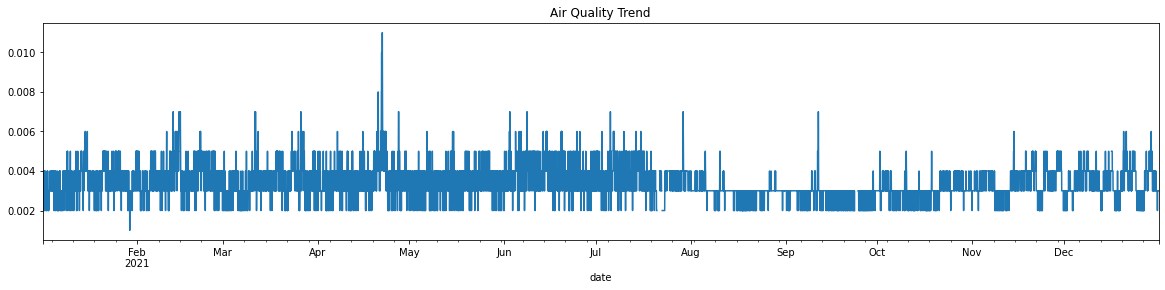

In [46]:
air_tmp['SO2']['2021'].plot(title="Air Quality Trend", figsize=(20, 4))
plt.show()

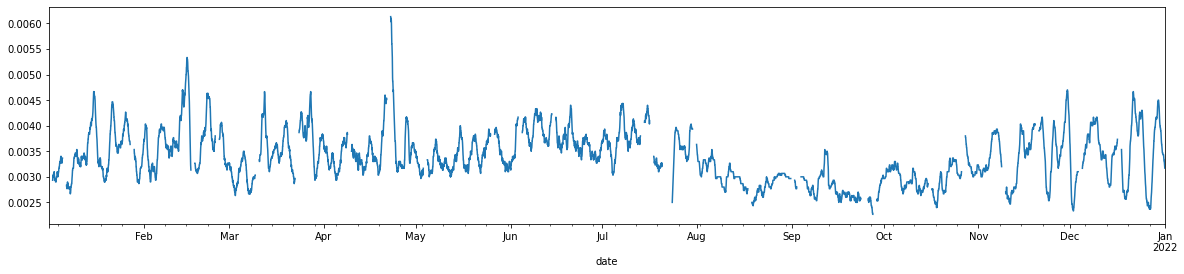

In [47]:
roll_mean = pd.Series.rolling(air_tmp['SO2'], window=30, center = False).mean()
roll_mean.plot(label='30 day rolling mean', figsize=(20, 4))

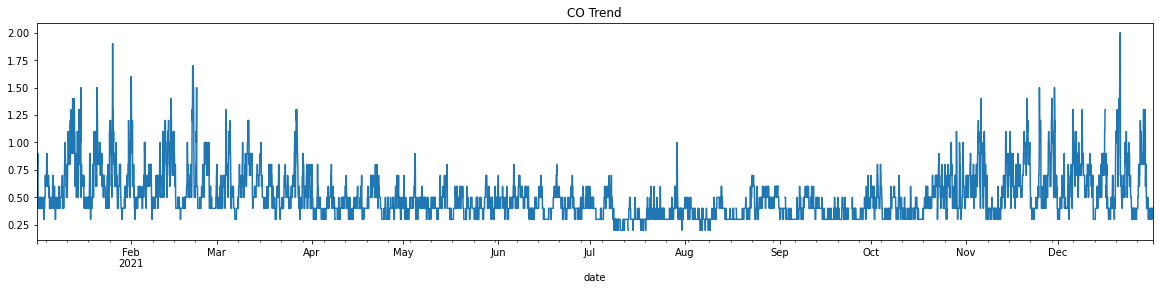

In [48]:
air_tmp['CO']['2021'].plot(title="CO Trend", figsize=(20, 4))
plt.show()

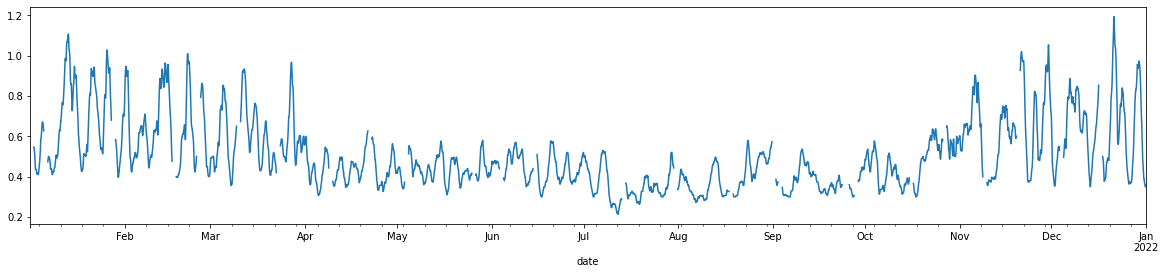

In [49]:
roll_mean = pd.Series.rolling(air_tmp['CO'], window=30, center = False).mean()
roll_mean.plot(label='30 day rolling mean', figsize=(20, 4))

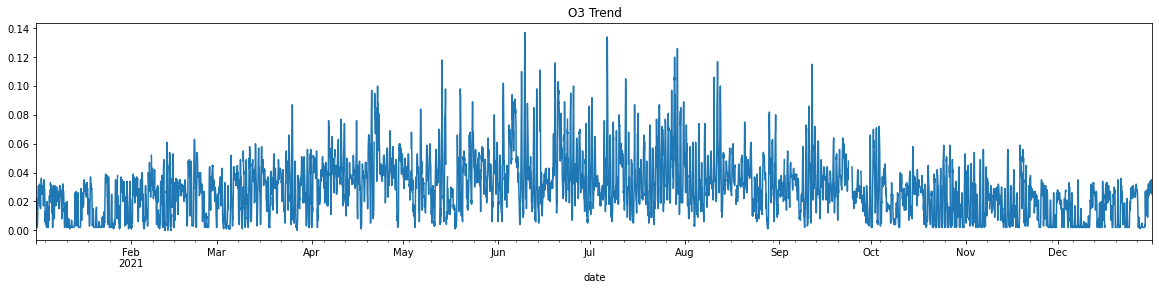

In [50]:
# 오존 농도는 오후에 높게 나옴
air_tmp['O3']['2021'].plot(title="O3 Trend", figsize=(20, 4))
plt.show()

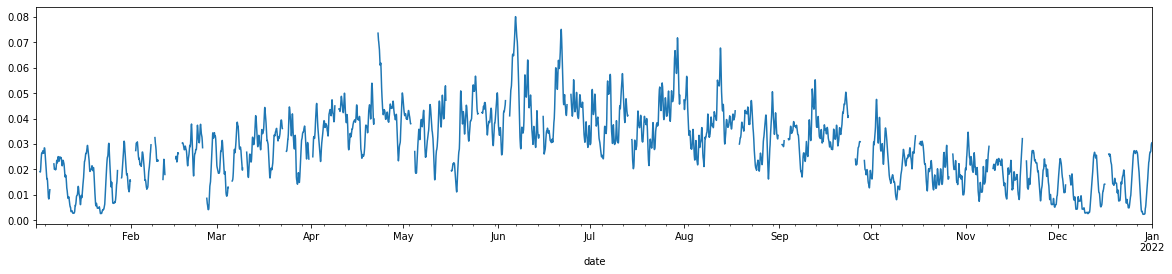

In [51]:
roll_mean = pd.Series.rolling(air_tmp['O3'], window=30, center = False).mean()
roll_mean.plot(label='30 day rolling mean', figsize=(20, 4))

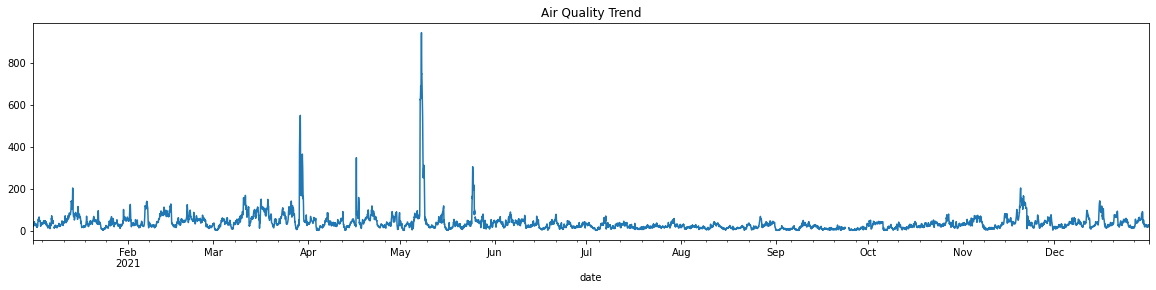

In [52]:
air_tmp['PM10']['2021'].plot(title="Air Quality Trend", figsize=(20, 4))
plt.show()

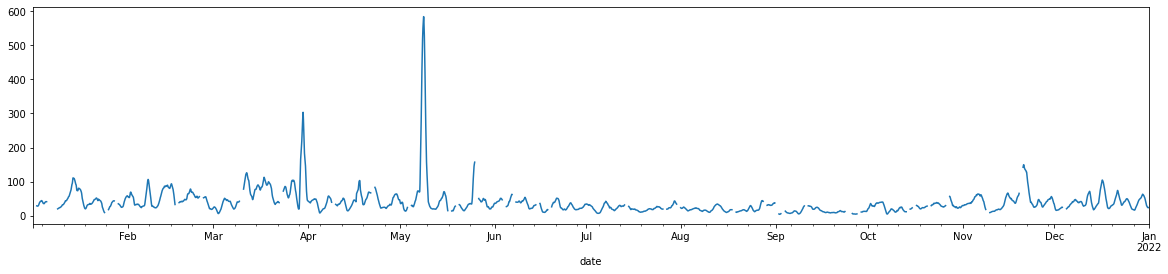

In [53]:
roll_mean = pd.Series.rolling(air_tmp['PM10'], window=30, center = False).mean()
roll_mean.plot(label='30 day rolling mean', figsize=(20, 4))

도출된 인사이트 딱히...
- 오존은 오후에 높아지며, 여름에 높아진다  
- 5월달에 미세먼지가 최고치를 찍었다 (황사?)
- 아황산가스는 가을이 제일 낮다  
- 일산화탄소는 겨울~봄에 높아진다 (난방 - 가스보일러, 가스온풍기)

### **시간에 따른 날씨**

In [54]:
weather_tmp = weather_21.set_index('date')

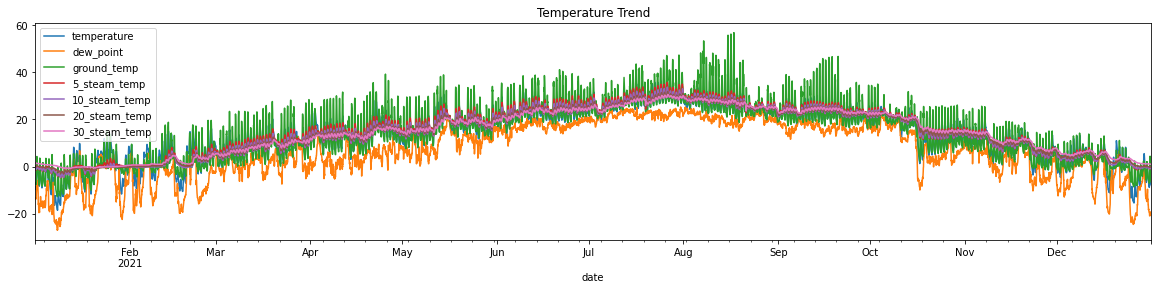

In [55]:
weather_tmp[['temperature', 'dew_point', 'ground_temp', '5_steam_temp', '10_steam_temp', '20_steam_temp', '30_steam_temp']]['2021'].plot(title="Temperature Trend", figsize=(20, 4))
plt.show()

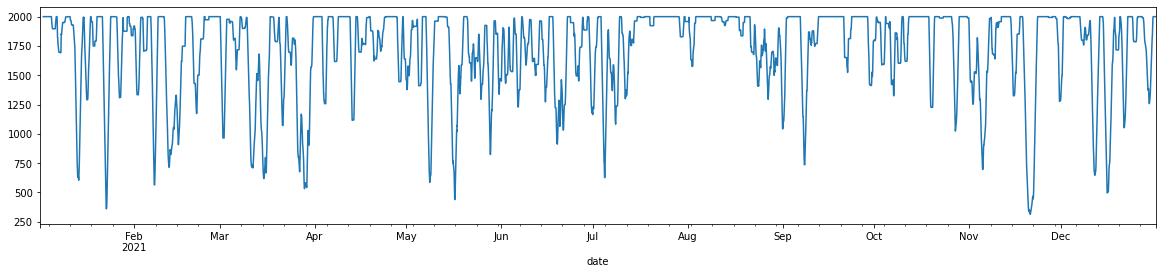

In [56]:
roll_mean = pd.Series.rolling(weather_tmp['visuality'], window=30, center = False).mean()
roll_mean.plot(label='30 day rolling mean', figsize=(20, 4))

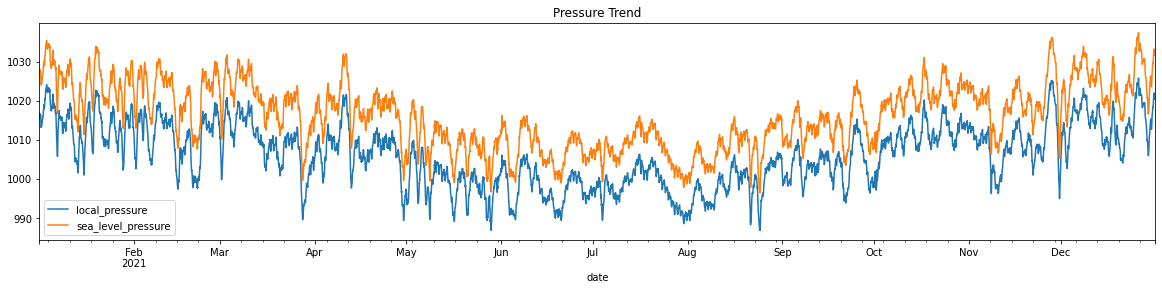

In [57]:
weather_tmp[['local_pressure', 'sea_level_pressure']]['2021'].plot(title="Pressure Trend", figsize=(20, 4))
plt.show()

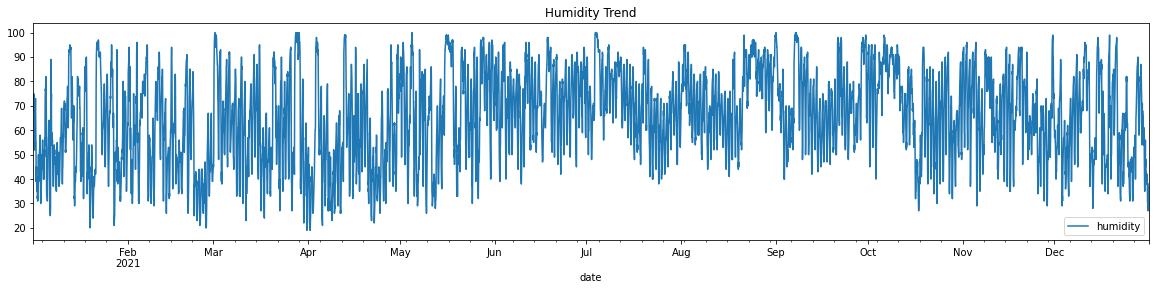

In [58]:
weather_tmp[['humidity']]['2021'].plot(title="Humidity Trend", figsize=(20, 4))
plt.show()

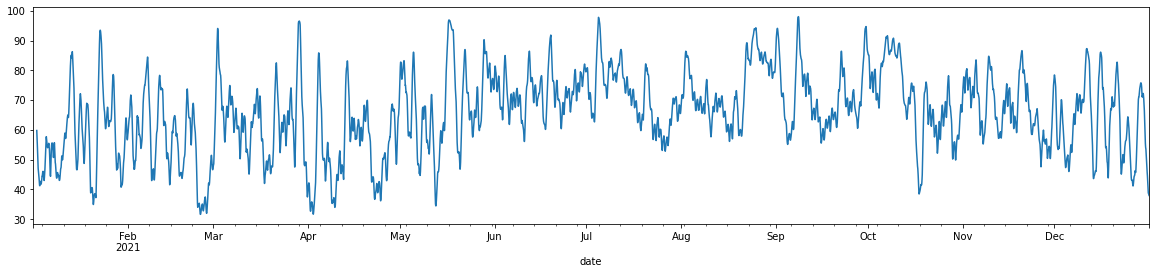

In [59]:
roll_mean = pd.Series.rolling(weather_tmp['humidity'], window=30, center = False).mean()
roll_mean.plot(label='30 day rolling mean', figsize=(20, 4))

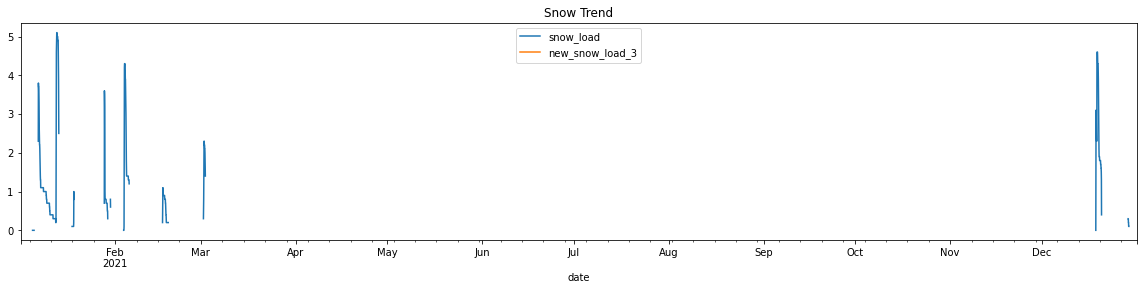

In [60]:
weather_tmp[['snow_load', 'new_snow_load_3']]['2021'].plot(title="Snow Trend", figsize=(20, 4))
plt.show()

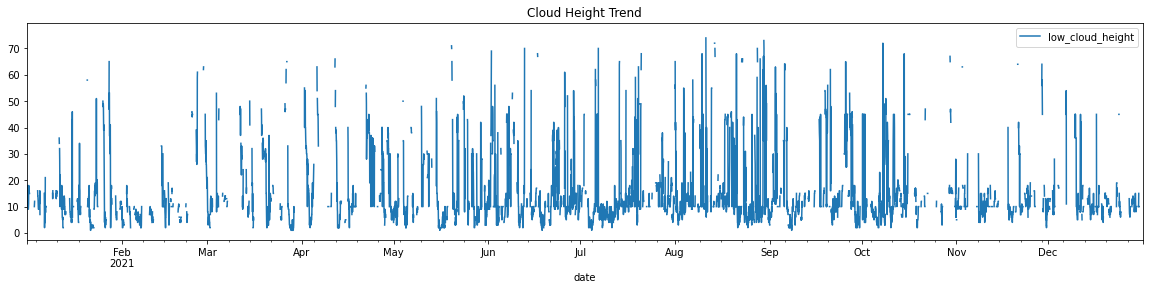

In [61]:
weather_tmp[['low_cloud_height']]['2021'].plot(title="Cloud Height Trend", figsize=(20, 4))
plt.show()

In [62]:
weather_tmp['precipitation'].isna().sum()

7810

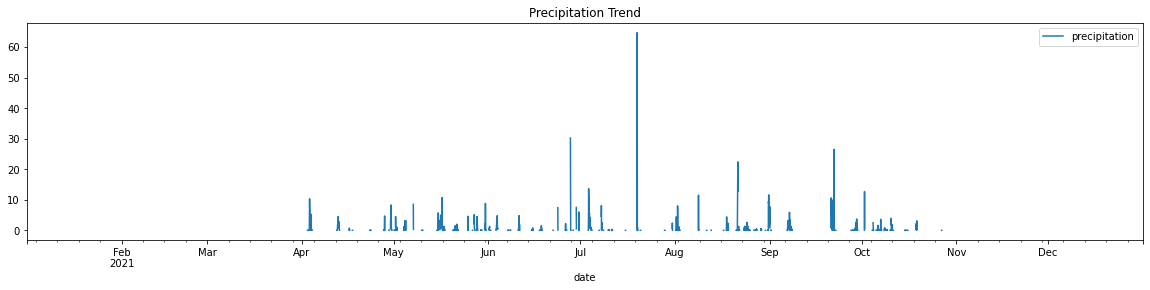

In [63]:
weather_tmp[['precipitation']]['2021'].plot(title="Precipitation Trend", figsize=(20, 4))
plt.show() # 결측값이 많음

visuality는 가을이 제일 괜찮음  
이 외 데이터는 범주형이거나, 결측값이 많음

### **데이터 병합**

21년도, 22년도 air, weather 데이터셋 날짜에 따라 병합

In [64]:
data_21 = pd.merge(air_21, weather_21, how='outer', on='date')
data_21

,local_code_x,date,SO2,CO,O3,NO2,PM10,PM25,local_code_y,temperature,...,middle_level_cloud,cloud_shape,low_cloud_height,visuality,code,ground_temp,5_steam_temp,10_steam_temp,20_steam_temp,30_steam_temp
0,111123,2021-01-01 01:00:00,0.002,0.5,0.022,0.016,24.0,14.0,108.0,-8.7,...,0.0,NaN,NaN,2000.0,NaN,-6.9,-1.0,-0.8,0.3,1.6
1,111123,2021-01-01 02:00:00,0.002,0.6,0.018,0.020,25.0,14.0,108.0,-9.1,...,0.0,NaN,NaN,2000.0,NaN,-7.1,-1.1,-0.8,0.3,1.6
2,111123,2021-01-01 03:00:00,0.002,0.6,0.013,0.025,27.0,16.0,108.0,-9.3,...,0.0,NaN,NaN,2000.0,NaN,-7.3,-1.2,-0.9,0.3,1.6
3,111123,2021-01-01 04:00:00,0.003,0.6,0.011,0.027,23.0,13.0,108.0,-9.3,...,0.0,NaN,NaN,2000.0,NaN,-7.5,-1.3,-1.0,0.2,1.5
4,111123,2021-01-01 05:00:00,0.003,0.6,0.008,0.032,24.0,14.0,108.0,-9.7,...,0.0,NaN,NaN,2000.0,NaN,-7.6,-1.3,-1.0,0.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,111123,2021-12-31 20:00:00,0.003,0.4,0.025,0.020,26.0,8.0,108.0,-6.3,...,0.0,NaN,NaN,2000.0,NaN,-5.3,-0.6,-0.8,-0.1,1.0
8756,111123,2021-12-31 21:00:00,0.003,0.4,0.030,0.014,27.0,9.0,108.0,-6.7,...,0.0,NaN,NaN,2000.0,NaN,-5.7,-0.7,-0.8,-0.1,1.0
8757,111123,2021-12-31 22:00:00,0.003,0.4,0.033,0.011,20.0,8.0,108.0,-7.5,...,0.0,NaN,NaN,2000.0,NaN,-6.2,-0.8,-0.9,-0.2,1.0
8758,111123,2021-12-31 23:00:00,0.003,0.4,0.029,0.015,20.0,9.0,108.0,-7.7,...,0.0,NaN,NaN,2000.0,NaN,-6.5,-0.9,-0.9,-0.2,1.0


In [65]:
data_22 = pd.merge(air_22, weather_22, how='outer', on='date')
data_22

,local_code_x,date,SO2,CO,O3,NO2,PM10,PM25,local_code_y,temperature,...,middle_level_cloud,cloud_shape,low_cloud_height,visuality,code,ground_temp,5_steam_temp,10_steam_temp,20_steam_temp,30_steam_temp
0,111123.0,2022-01-01 01:00:00,0.003,0.4,0.026,0.016,23.0,12.0,108.0,-9.2,...,0.0,NaN,NaN,2000.0,NaN,-7.2,-1.1,-1.1,-0.2,1.0
1,111123.0,2022-01-01 02:00:00,0.003,0.4,0.022,0.020,20.0,9.0,108.0,-9.5,...,0.0,NaN,NaN,2000.0,NaN,-7.5,-1.3,-1.2,-0.2,1.0
2,111123.0,2022-01-01 03:00:00,0.003,0.5,0.014,0.028,20.0,9.0,108.0,-9.3,...,0.0,NaN,NaN,2000.0,NaN,-7.6,-1.4,-1.2,-0.2,1.0
3,111123.0,2022-01-01 04:00:00,0.003,0.5,0.016,0.027,19.0,10.0,108.0,-9.6,...,0.0,NaN,NaN,2000.0,NaN,-7.6,-1.4,-1.3,-0.3,1.0
4,111123.0,2022-01-01 05:00:00,0.003,0.5,0.005,0.040,24.0,11.0,108.0,-9.7,...,0.0,NaN,NaN,2000.0,NaN,-7.7,-1.5,-1.4,-0.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,111123.0,2022-03-31 21:00:00,0.002,0.4,0.032,0.018,10.0,7.0,108.0,10.5,...,1.0,Sc,10.0,2000.0,NaN,7.8,11.8,11.4,11.0,10.4
2157,111123.0,2022-03-31 22:00:00,0.003,0.3,0.038,0.013,11.0,5.0,108.0,9.3,...,3.0,NaN,10.0,2000.0,NaN,7.3,11.4,11.1,10.9,10.5
2158,111123.0,2022-03-31 23:00:00,0.003,0.3,0.036,0.015,11.0,5.0,108.0,8.4,...,1.0,NaN,10.0,2000.0,NaN,6.7,11.0,10.8,10.8,10.5
2159,111123.0,2022-04-01 00:00:00,0.002,0.4,0.033,0.017,9.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
data = pd.concat([data_21, data_22], axis=0)
data.head()

,local_code_x,date,SO2,CO,O3,NO2,PM10,PM25,local_code_y,temperature,...,middle_level_cloud,cloud_shape,low_cloud_height,visuality,code,ground_temp,5_steam_temp,10_steam_temp,20_steam_temp,30_steam_temp
0,111123.0,2021-01-01 01:00:00,0.002,0.5,0.022,0.016,24.0,14.0,108.0,-8.7,...,0.0,NaN,NaN,2000.0,NaN,-6.9,-1.0,-0.8,0.3,1.6
1,111123.0,2021-01-01 02:00:00,0.002,0.6,0.018,0.020,25.0,14.0,108.0,-9.1,...,0.0,NaN,NaN,2000.0,NaN,-7.1,-1.1,-0.8,0.3,1.6
2,111123.0,2021-01-01 03:00:00,0.002,0.6,0.013,0.025,27.0,16.0,108.0,-9.3,...,0.0,NaN,NaN,2000.0,NaN,-7.3,-1.2,-0.9,0.3,1.6
3,111123.0,2021-01-01 04:00:00,0.003,0.6,0.011,0.027,23.0,13.0,108.0,-9.3,...,0.0,NaN,NaN,2000.0,NaN,-7.5,-1.3,-1.0,0.2,1.5
4,111123.0,2021-01-01 05:00:00,0.003,0.6,0.008,0.032,24.0,14.0,108.0,-9.7,...,0.0,NaN,NaN,2000.0,NaN,-7.6,-1.3,-1.0,0.2,1.5


지점 코드, 3시간 신적설, 현상코드 삭제

In [105]:
empty_cols(data.columns, data, rate=0.5)

['precipitation', 'snow_load', 'new_snow_load_3', 'low_cloud_height', 'code']

In [106]:
data.drop(columns = ['local_code_x', 'local_code_y', 'new_snow_load_3', 'code'], inplace=True)

In [107]:
data

,date,SO2,CO,O3,NO2,PM10,PM25,temperature,precipitation,wind_speed,...,total_cloud,middle_level_cloud,cloud_shape,low_cloud_height,visuality,ground_temp,5_steam_temp,10_steam_temp,20_steam_temp,30_steam_temp
0,2021-01-01 01:00:00,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,NaN,2.4,...,0.0,0.0,NaN,NaN,2000.0,-6.9,-1.0,-0.8,0.3,1.6
1,2021-01-01 02:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-9.1,NaN,1.6,...,0.0,0.0,NaN,NaN,2000.0,-7.1,-1.1,-0.8,0.3,1.6
2,2021-01-01 03:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.3,NaN,1.1,...,0.0,0.0,NaN,NaN,2000.0,-7.3,-1.2,-0.9,0.3,1.6
3,2021-01-01 04:00:00,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,NaN,0.3,...,0.0,0.0,NaN,NaN,2000.0,-7.5,-1.3,-1.0,0.2,1.5
4,2021-01-01 05:00:00,0.003,0.6,0.008,0.032,24.0,14.0,-9.7,NaN,1.9,...,0.0,0.0,NaN,NaN,2000.0,-7.6,-1.3,-1.0,0.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,2022-03-31 21:00:00,0.002,0.4,0.032,0.018,10.0,7.0,10.5,NaN,3.5,...,1.0,1.0,Sc,10.0,2000.0,7.8,11.8,11.4,11.0,10.4
2157,2022-03-31 22:00:00,0.003,0.3,0.038,0.013,11.0,5.0,9.3,NaN,1.9,...,3.0,3.0,NaN,10.0,2000.0,7.3,11.4,11.1,10.9,10.5
2158,2022-03-31 23:00:00,0.003,0.3,0.036,0.015,11.0,5.0,8.4,NaN,1.2,...,1.0,1.0,NaN,10.0,2000.0,6.7,11.0,10.8,10.8,10.5
2159,2022-04-01 00:00:00,0.002,0.4,0.033,0.017,9.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **결측치 처리**

집중 호우 기간에는 강수량이 나타나며, 강수량이 적은 겨울에 결측 값이 많이 분포됨  
적설량 또한 겨울에 값이 나타나며, 다른 계절에 결측 값이 많이 분포됨

-> 0으로 채움


In [108]:
data['month'] = data['date'].dt.month
data['hour'] = data['date'].dt.hour
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day

In [109]:
train = data[data['year'] == 2021]
test = data[data['year'] == 2022]

In [110]:
train['precipitation'] = train['precipitation'].fillna(0)
train['snow_load'] = train['snow_load'].fillna(0)

test['precipitation'] = test['precipitation'].fillna(0)
test['snow_load'] = test['snow_load'].fillna(0)

범주형 cloud_shape, wind_direction은 앞의 값 또는 뒤의 값으로 채움

In [111]:
train['cloud_shape'] = train['cloud_shape'].fillna(method='ffill')
train['cloud_shape'] = train['cloud_shape'].fillna(method='bfill')

train['wind_direction'] = train['wind_direction'].fillna(method='ffill')

test['cloud_shape'] = test['cloud_shape'].fillna(method='ffill')
test['cloud_shape'] = test['cloud_shape'].fillna(method='bfill')

test['wind_direction'] = test['wind_direction'].fillna(method='ffill')
test['wind_direction'] = test['wind_direction'].fillna(method='bfill')

범주형 변수 가변수화

In [112]:
def get_dummies(data, cols, prefix):
    for c, pf in zip(cols, prefix):
        data_tmp = pd.get_dummies(data[c], prefix=pf, drop_first = 1)
        data = pd.concat([data, data_tmp], axis=1)
        data.drop(columns=[c], inplace=True)

    return data

In [114]:
data = pd.concat([train, test], axis=0)
data = get_dummies(data, cols=['wind_direction', 'cloud_shape'], prefix=['wd', 'cs'])

train = data[data['year'] == 2021]
test = data[data['year'] == 2022]

In [115]:
train.shape, test.shape

((8759, 92), (2162, 92))

### **결측치 처리 방법 1. interpolate**
 ~ data_1

In [116]:
import copy
train_1 = copy.deepcopy(train)
test_1 = copy.deepcopy(test)

In [117]:
def interpolation(data, cols, method='linear'):
    for c in cols:
        data[c] = data[c].interpolate(method=method)
    return data

In [118]:
def fill_na(data, cols, method='bfill'):
    for c in cols:
        data[c] = data[c].fillna(method=method)
    return data

In [119]:
cols = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'total_cloud', 'middle_level_cloud', 'wind_speed', 'local_pressure', 'vapor_pressure', 'sea_level_pressure', 'humidity', \
        'sunshine_time', 'solar_radiation', 'low_cloud_height', 'visuality', 'temperature', 'dew_point', 'ground_temp', '5_steam_temp', '10_steam_temp', '20_steam_temp', '30_steam_temp']

train_1 = interpolation(train_1, cols, method='linear')
test_1 = interpolation(test_1, cols, method='linear')

In [120]:
left_cols = ['sunshine_time', 'solar_radiation', 'low_cloud_height']
train_1 = fill_na(train_1, left_cols, method='bfill')

In [121]:
left_cols = ['total_cloud', 'middle_level_cloud', 'wind_speed', 'local_pressure', 'vapor_pressure', 'sea_level_pressure', \
             'humidity', 'sunshine_time', 'solar_radiation', 'low_cloud_height', 'visuality', 'temperature', \
             'dew_point', 'ground_temp', '5_steam_temp', '10_steam_temp', '20_steam_temp', '30_steam_temp']
test_1 = fill_na(test_1, left_cols, method='bfill')

In [126]:
train_1.shape, test_1.shape

((8759, 93), (2162, 93))

Target 값 정의: 한 시간 후 PM10

In [125]:
train_1['next_PM10'] = train_1['PM10'].shift(-1)
train_1.to_csv("data_pm/train_1.csv", index=False)

test_1['next_PM10'] = test_1['PM10'].shift(-1)
test_1.to_csv("data_pm/test_1.csv", index=False)

### **결측치 처리 방법 2. KNNImputer**


In [127]:
train_2 = copy.deepcopy(train)
test_2 = copy.deepcopy(test)

In [128]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

train_2.drop(columns =['date'], inplace=True)
test_2.drop(columns =['date'], inplace=True)


cols = train_2.columns
train_filled = imputer.fit_transform(train_2)
test_filled = imputer.fit_transform(test_2)

In [129]:
train_2 = pd.DataFrame(train_filled, columns=cols)
train_2.head()

,SO2,CO,O3,NO2,PM10,PM25,temperature,precipitation,wind_speed,humidity,...,cs_ScAs,cs_ScAsCi,cs_ScCc,cs_ScCcCi,cs_ScCi,cs_ScCs,cs_St,cs_StAs,cs_StAsCi,cs_StNs
0,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002,0.6,0.018,0.020,25.0,14.0,-9.1,0.0,1.6,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002,0.6,0.013,0.025,27.0,16.0,-9.3,0.0,1.1,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,0.3,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003,0.6,0.008,0.032,24.0,14.0,-9.7,0.0,1.9,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
test_2 = pd.DataFrame(test_filled, columns=cols)
test_2.head()

,SO2,CO,O3,NO2,PM10,PM25,temperature,precipitation,wind_speed,humidity,...,cs_ScAs,cs_ScAsCi,cs_ScCc,cs_ScCcCi,cs_ScCi,cs_ScCs,cs_St,cs_StAs,cs_StAsCi,cs_StNs
0,0.003,0.4,0.026,0.016,20.0,9.0,-7.38,0.0,1.68,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.003,0.4,0.026,0.016,23.0,12.0,-9.20,0.0,1.80,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.003,0.4,0.022,0.020,20.0,9.0,-9.50,0.0,1.20,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003,0.5,0.014,0.028,20.0,9.0,-9.30,0.0,1.40,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003,0.5,0.016,0.027,19.0,10.0,-9.60,0.0,1.70,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
def to_datetime(data):
    datetimes = []
    for idx, row in data.iterrows():
        y, m, d, h = int(row['year']), int(row['month']), int(row['day']), int(row['hour'])
        datetimes += [pd.to_datetime("%04d%02d%02d%02d" % (y, m, d, h), format='%Y%m%d%H')]
    data['date'] = datetimes
    return data

In [132]:
train_2 = to_datetime(train_2)
test_2 = to_datetime(test_2)

Target 값 정의: 한 시간 후 PM10

In [133]:
train_2['next_PM10'] = train_2['PM10'].shift(-1)
train_2.to_csv("data_pm/train_2.csv", index=False)

test_2['next_PM10'] = test_2['PM10'].shift(-1)
test_2.to_csv("data_pm/test_2.csv", index=False)